## Ham or Spam

##### To identify whether a text message is spam or ham

In [1]:
!pip install wordcloud

In [20]:
import pandas as pd

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [23]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1) # Removing NAN columns
# df=df[["v1",v2]]

In [25]:
df.columns=["Class","Text"] # Setting column names

In [26]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
import seaborn as sns

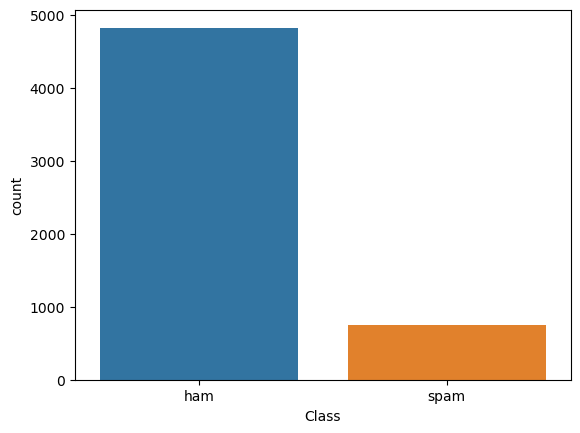

In [28]:
sns.countplot(x=df["Class"]);

In [29]:
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [30]:
# Converting text(spam/ham) to numbers

In [31]:
d={"ham":0, "spam":1}

In [32]:
df["Class"]=df["Class"].map(d)

In [33]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### ML preprocessing

In [34]:
# NLP requirements: lowercase, no punctuations...

In [35]:
df["Text"]=df["Text"].str.lower()
df["Text"]=df["Text"].str.replace("[^\w\s]","") # Remove punctuation
df["Text"]=df["Text"].str.replace("\n","") # Remove newlines
df["Text"]=df["Text"].str.replace("\r","") # Remove enters
df["Text"]=df["Text"].str.replace("\d+","") # Remove digits/numbers

In [36]:
# Creating a wordcloud

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS # Unnecessary words used in sentences
from PIL import Image # Python Imaging Library
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Creating a function for generating wordclouds for spam and ham

In [80]:
def wc(data,bgcolor): # red bgcolor for spam
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png")) # shape of cloud in np array
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data)) # does for all rows in the dataframe
    plt.imshow(wc)
    plt.axis("off")

In [81]:
ham=df[df["Class"]==0]["Text"] # Selecting text from ham rows
spam=df[df["Class"]==1]["Text"] # Selecting text from spam rows

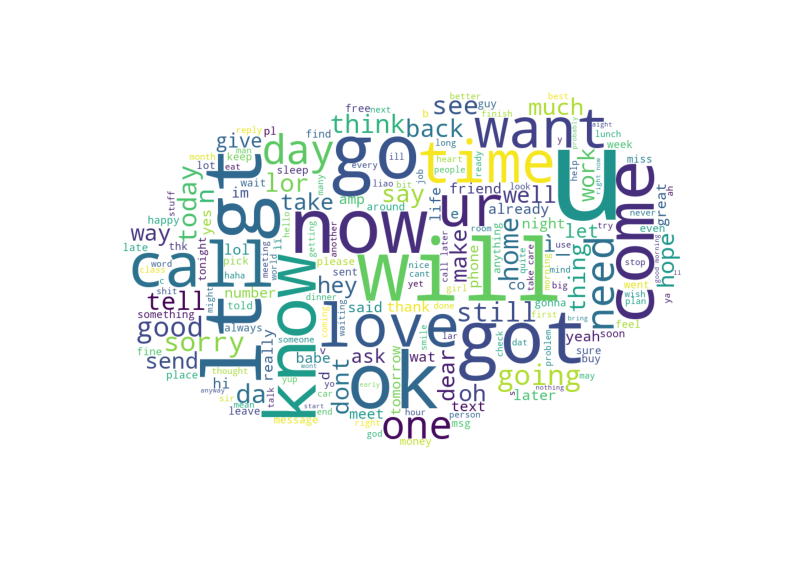

In [82]:
wc(ham,"white")

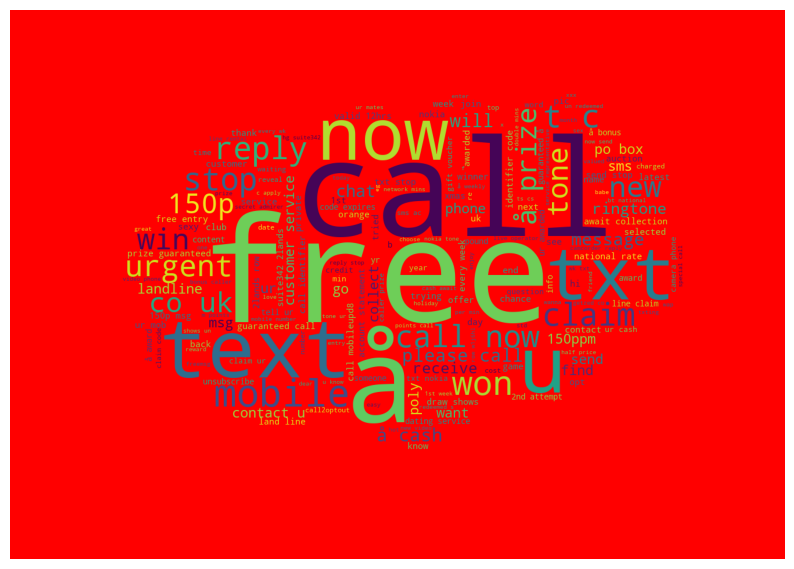

In [83]:
wc(spam,"red")

In [61]:
# https://github.com/amueller/word_cloud

#### ML implementation

In [84]:
x=df["Text"]
y=df["Class"]

In [85]:
from sklearn.naive_bayes import MultinomialNB # if more than two/Binary options, use multinomial
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [91]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [97]:
def lemma(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
# ngrm_range : check context within range 1-2 words
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),analyzer=lemma)

In [100]:
x=vect.fit_transform(x)

In [101]:
x.shape

(5572, 7853)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [103]:
nb=MultinomialNB()

In [104]:
nb.fit(x_train,y_train)

MultinomialNB()

In [105]:
pred=nb.predict(x_test)

In [106]:
accuracy_score(y_test,pred)

0.97847533632287